<a href="https://colab.research.google.com/github/AstrophyJimmy/White_Dwarf_Numerical_Model/blob/main/White_Dwarf_Numerical_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numerical Model of White Dwarfs

Having The Fermi pressure of a non-relativistic (NR) degenerate electron gas: 
$$P_{NR} = K_{NR} \Big(\dfrac{\rho}{\mu_e}\Big)^{5/3}$$
where $K_{NR}\approx 1.00\times10^{13}$ [cgs]

And The Fermi pressure of an ultrarelativistic (UR) degenerate electron gas: 
$$P_{UR} = K_{UR} \Big(\dfrac{\rho}{\mu_e}\Big)^{4/3}$$
where $K_{UR}\approx 1.24\times10^{15}$ [cgs]

$P_{NR}$ and $P_{UR}$ intesect at $\rho_0 = \mu_e \Big(\dfrac{K_{UR}}{K_{NR}}\Big)^3 \approx 3.79 \times 10^6$ g cm$^{-3}$

Patching the two expressions together we'll get
$$P(\rho) = \dfrac{P_{NR}P_{UR}}{\sqrt{P_{NR}^2+P_{UR}^2}} = \dfrac{K_{NR}(\rho/\mu_e)^{5/3}}{\sqrt{1+(\rho/\rho_0)^{2/3}}}$$

This expression shows plausible behaviour at high and low $\rho$

Solving the equation of Hydrostatic Equilibrium for spherical symmetry
$$\frac{1}{r^2}\frac{d}{dr}\Big(r^2\frac{1}{\rho}\frac{dP}{dr}\Big)=-4\pi G\rho$$

Nondimensionalizing by introducing $\theta=\rho/\rho_0$ and $s=r/a$

Then $\frac{d}{dr}=\frac{1}{a}\frac{d}{ds}$

substituting we get
$$\frac{1}{s^2}\frac{d}{ds}\Big(\frac{s^2}{\theta}\frac{dP}{ds}\Big)=-4\pi G \rho_0^2 a^2 \theta$$

And we need to set $a^2$ such that $$4\pi G \rho_0^2 a^2 = 1$$

and $P(\theta) = \alpha \dfrac{\theta^{5/3}}{\sqrt{1+\theta^{2/3}}}$ where $\alpha = K_{NR}(\rho_0/\mu_e)^{5/3}$

after some manipulation to find the value of $a$, i.e.

$a\approx \frac{K_{NR}}{\mu_e}\sqrt{\frac{1}{4\pi G K_{UR}}}\approx 1.55\times 10^8$ cm

Now the equation is reduced to
$$\frac{1}{s^2}\frac{d}{ds}\Big(\frac{s^2}{\theta}\frac{d}{ds}\Big(\frac{\theta^{5/3}}{\sqrt{1+\theta^{2/3}}}\Big)\Big)= -\theta$$

Substitue in the Differential Equation we get:

$$
\frac{12 \theta (s)^{7/3} \left(2 \theta '(s)+s \theta ''(s)\right)+27 \theta
   (s)^{5/3} \left(2 \theta '(s)+s \theta ''(s)\right)+15 \theta (s) \left(2 \theta
   '(s)+s \theta ''(s)\right)-8 s \theta (s)^{4/3} \theta '(s)^2-16 s \theta
   (s)^{2/3} \theta '(s)^2-5 s \theta '(s)^2}{9 s \left(\theta
   (s)^{2/3}+1\right)^{5/2} \theta (s)^{4/3}} = -\theta(s)
$$

defining $V(s)=\theta'(s)$ 

$$
\frac{12 \theta (s)^{7/3} \left(2 V(s)+s V'(s)\right)+27 \theta
   (s)^{5/3} \left(2 V(s)+s V'(s)\right)+15 \theta (s) \left(2 V(s)+s V'(s)\right)-8 s \theta (s)^{4/3} V(s)^2-16 s \theta
   (s)^{2/3} V(s)^2-5 s V^2(s)}{9 s \left(\theta
   (s)^{2/3}+1\right)^{5/2} \theta (s)^{4/3}} = -\theta(s)
$$

Next We collect coefficients of $V ,V^2 ,V'$ and do completing squares, some algebriac griding goes on for a while. 

I will omit the $(s)$ from now on being the independent variable for $V$ and $\theta$.

Simplifying we get two differential equations:

$$\frac{d\theta}{ds}=V=f(V,\theta,s)$$
$$\frac{dV}{ds} = -\frac{2}{s}V-\frac{B}{A}V^2-\frac{1}{A}\theta=g(V,\theta,s)$$
Where:

$A = \frac{5}{3}\theta^{-1/3}C^{-1/2}-\frac{1}{3}\theta^{1/3}C^{-3/2}$

$B = \frac{-5}{9}\theta^{-4/3}C^{-1/2}-\frac{2}{3}\theta^{-2/3}C^{-3/2}+\frac{1}{3}C^{-5/2}$

$C = (1+\theta^{2/3})$

I will construct two functions $V$ and $f$ accounting for both of the differential equations.

With the Boundary Conditions as 
$$V(0)=0, \theta(0)=\theta_c$$

$\rho_c=10^4, 10^{4.5}, 10^5, 10^{5.5}, \dotsm 10^{11.5}, 10^{12} $

$\theta_c = \rho_c/\rho_0$

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import trapz as integral
from scipy import optimize 

def f(s, theta, V):
  return V

def g(s, theta, V):
  C = 1 + np.power(theta, 2/3)
  A = 5/3*np.power(theta, -1/3)*np.power(C, -1/2) - 1/3*np.power(theta, 1/3)*np.power(C, -3/2)
  B = -5/9*np.power(theta, -4/3)*np.power(C, -1/2) - 2/3*np.power(theta, -2/3)*np.power(C, -3/2) + 1/3*np.power(C, -5/2)
  return -2/s*V - B/A*np.power(V, 2) - 1/A * theta

def RK4(s, theta, V, h, f, g):
  """
  Defining Runge-Kutta 4th Order method to solve two coupled first order ODEs
  """
  k1=h*f(s, theta, V)
  l1=h*g(s, theta, V)
  
  k2=h*f(s+.5*h, theta+.5*k1, V + 0.5*l1)
  l2=h*g(s+.5*h, theta+.5*k1, V + 0.5*l1)
  
  k3=h*f(s+.5*h, theta+.5*k2, V + 0.5*l2)
  l3=h*g(s+.5*h, theta+.5*k2, V + 0.5*l2)

  k4=h*f(s+h, theta+k3, V + l3)
  l4=h*g(s+h, theta+k3, V + l3)

  k=(1/6)*(k1+2*k2+2*k3+k4)
  l=(1/6)*(l1+2*l2+2*l3+l4)

  return theta + k, V + l


In [ ]:
rho_0 = 3.79 * 1e6
powers = np.arange(4,12.5,0.5)
rho_cs = np.power(10, powers)
theta_cs = rho_cs/rho_0

In [ ]:
h = 1e-3
a = 1.55 * 1e8
sols = {}
Masses = np.array([])
Radii = np.array([])

for i,theta_c in enumerate(theta_cs):
  sols.update({str(powers[i]):{'s':np.array([]),'theta':np.array([]), 'V':np.array([]), 'Mass':np.array([])}})
  s = np.array([1e-100]) #starting from the center
  theta = np.array([theta_c])
  V = np.array([0])
  j = 0
  while(theta[j]/theta_c > 1e-3):
    newTheta, newV = RK4(s[j], theta[j], V[j], h, f, g)
    newS = s[j]+h
    s = np.append(s,newS)
    theta = np.append(theta, newTheta)
    V = np.append(V, newV)
    j += 1
  newRadius = a * s[-1]
  Radii = np.append(Radii, newRadius)
  newMass = 0.09*integral(np.power(s,2)*theta, x=s)
  Masses = np.append(Masses, newMass)
  sols[str(powers[i])]['s'] = s
  sols[str(powers[i])]['theta'] = theta
  sols[str(powers[i])]['V'] = V

In [ ]:
def findStableRegion(y, dy=0.1):
  arrs = []
  maxLen = 0
  maxArr = 0
  for i in range(len(y)-1):
    if i!= len(y)-1 and np.absolute(y[i]-y[i+1]) <= dy:
      arr = []
      for j in range(i, len(y)):
        if j != len(y)-1 and np.absolute(y[j]-y[j+1]) <= dy:
          arr.append(j)
        elif j == len(y)-1:
          arr.append(j)
        else: 
          break
      if len(arr) > maxLen: 
        maxLen = len(arr)
        maxArr = arr
  if len(maxArr) and maxArr[-1]!=len(y)-1 : maxArr.append(maxArr[-1]+1)
  return maxArr

# Point c

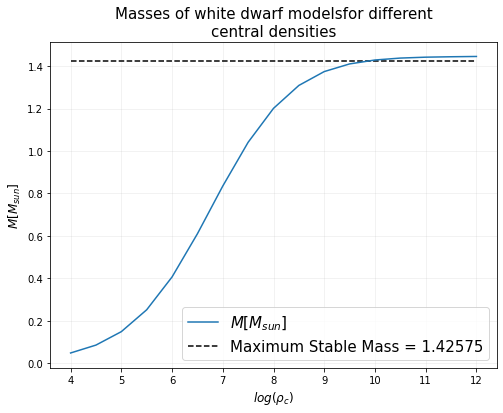

In [ ]:
maxStableMass=np.mean(Masses[findStableRegion(Masses,dy=0.05)])

fig=plt.figure(figsize=(8,6))
plt.title("Masses of white dwarf modelsfor different\ncentral densities", fontsize=15)
plt.plot(np.log10(rho_cs), Masses,label = r"$M [M_{sun}]$")
plt.hlines(maxStableMass, np.log10(rho_cs[0]),np.log10(rho_cs[-1]), ls='--', label='Maximum Stable Mass = '+str(np.round(maxStableMass, 5)))
plt.xlabel(r'$log (\rho_c)$', fontsize=12)
plt.ylabel(r"$M [M_{sun}]$",fontsize=12)
plt.grid(alpha=0.2)
plt.legend(loc = 'lower right', fontsize=15)
plt.show()

# Point d

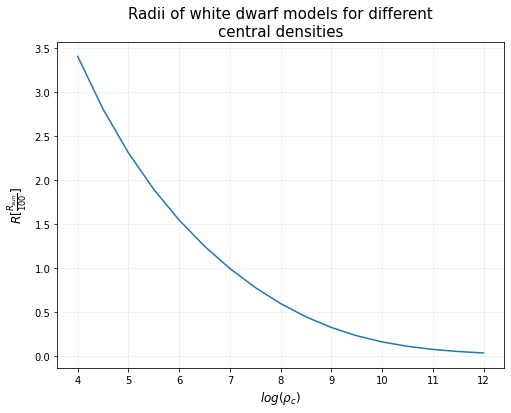

In [ ]:
R_sun = 69.634*1e9
fig=plt.figure(figsize=(8,6))
plt.title("Radii of white dwarf models for different\ncentral densities", fontsize=15)
plt.plot(np.log10(rho_cs), Radii/R_sun*100)
plt.xlabel(r'$log (\rho_c)$', fontsize=12)
plt.ylabel(r"$R [\frac{R_{sun}}{100}]$",fontsize=12)
plt.grid(alpha=0.2)
plt.show()

# Point e

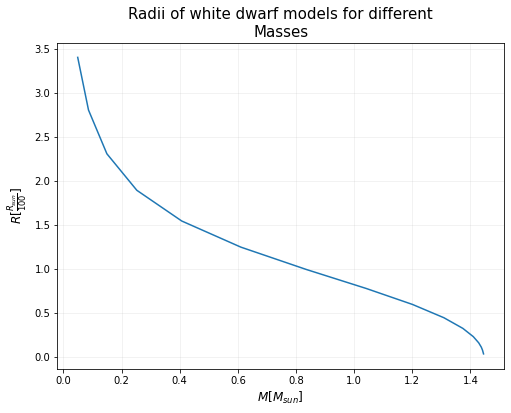

In [ ]:
fig=plt.figure(figsize=(8,6))
plt.title("Radii of white dwarf models for different\nMasses", fontsize=15)
plt.plot(Masses, Radii/R_sun*100)
plt.xlabel(r'$M [M_{sun}]$', fontsize=12)
plt.ylabel(r"$R [\frac{R_{sun}}{100}]$",fontsize=12)
plt.grid(alpha=0.2)
plt.show()

#  Point d
I will use a ninth degree polynomial fit to find the central densities that produces masses $M_{sun}$ and $1.3 M_{sun}$ respectively, They will be called 
 $M_1$ and $M_2$.

Sadely, I choose the degree by trial and error and visualizing the graphs on top of each other.

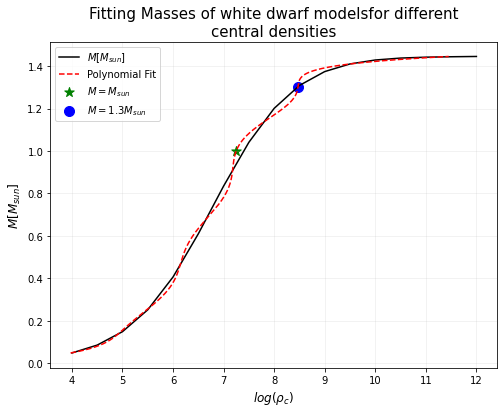

In [ ]:
fig=plt.figure(figsize=(8,6))
plt.title("Fitting Masses of white dwarf modelsfor different\ncentral densities", fontsize=15)
plt.plot(np.log10(rho_cs), Masses,label = r"$M [M_{sun}]$", color='k')

MassesSmooth = np.arange(Masses[0],Masses[-1],0.0001)

p = np.poly1d(np.polyfit(Masses, np.log10(rho_cs), 9))
plt.plot(p(MassesSmooth), MassesSmooth,label = "Polynomial Fit", color='r', ls='--')

plt.scatter(p(1), 1, 100, marker='*',label=r'$M=M_{sun}$',color='g')
plt.scatter(p(1.3), 1.3, 100, marker='o',label=r'$M=1.3M_{sun}$', color='b')
plt.xlabel(r'$log (\rho_c)$', fontsize=12)
plt.ylabel(r"$M [M_{sun}]$",fontsize=12)
plt.grid(alpha=0.2)
plt.legend()
plt.show()

In [ ]:
rho_cs_needed = np.power(10, np.array([p(1), p(1.3)])) 
theta_cs_needed = rho_cs_needed/rho_0
radialDistance = []
Density = []
for i,theta_c in enumerate(theta_cs):
  s = np.array([1e-100]) #starting from the center
  theta = np.array([theta_c])
  V = np.array([0])
  j = 0
  while(theta[j]/theta_c > 1e-3):
    newTheta, newV = RK4(s[j], theta[j], V[j], h, f, g)
    newS = s[j]+h
    s = np.append(s,newS)
    theta = np.append(theta, newTheta)
    V = np.append(V, newV)
    j += 1
  radialDistance.append(s*a)
  Density.append(theta*rho_0)

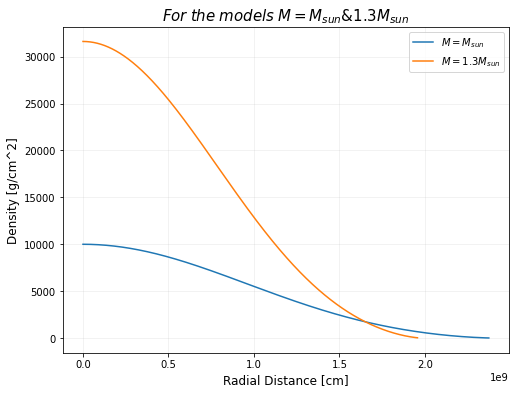

In [ ]:
fig = plt.figure( figsize= (8,6))
plt.title(r"$For\; the\; models\; M=M_{sun} & 1.3M_{sun}$",fontsize=15)
plt.plot(radialDistance[0],Density[0], label=r"$M=M_{sun}$")
plt.plot(radialDistance[1],Density[1], label=r"$M=1.3M_{sun}$")
plt.xlabel('Radial Distance [cm]', fontsize=12)
plt.ylabel('Density [g/cm^2]', fontsize=12)
plt.grid(alpha=0.2)
plt.legend()
plt.show()